In [2]:

import pyrealsense2 as rs
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [3]:
# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)


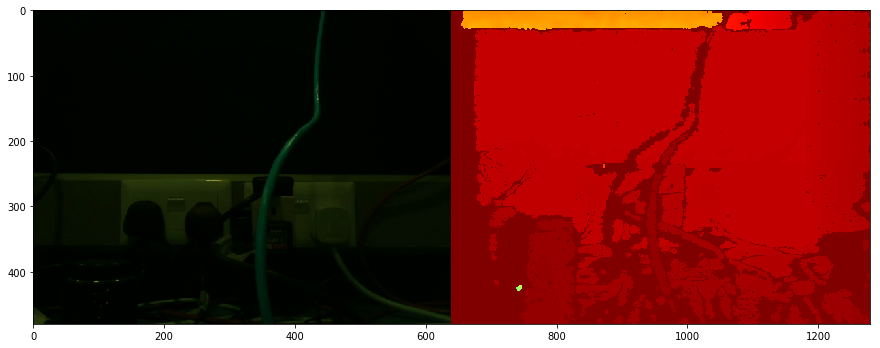

In [10]:
# Start streaming
pipeline.start(config)

depth_frame = None
color_frame = None

while not depth_frame or not color_frame:
    frames = pipeline.wait_for_frames()
    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()

# Convert images to numpy arrays
depth_image = np.asanyarray(depth_frame.get_data())
color_image = np.asanyarray(color_frame.get_data())

# Apply colormap on depth image (image must be converted to 8-bit per pixel first)
depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

# Stack both images horizontally
images = np.hstack((color_image, depth_colormap))

# Show images
fig = plt.figure(figsize=(15, 15))
plt.imshow(images)
plt.show()

# Stop streaming
pipeline.stop()

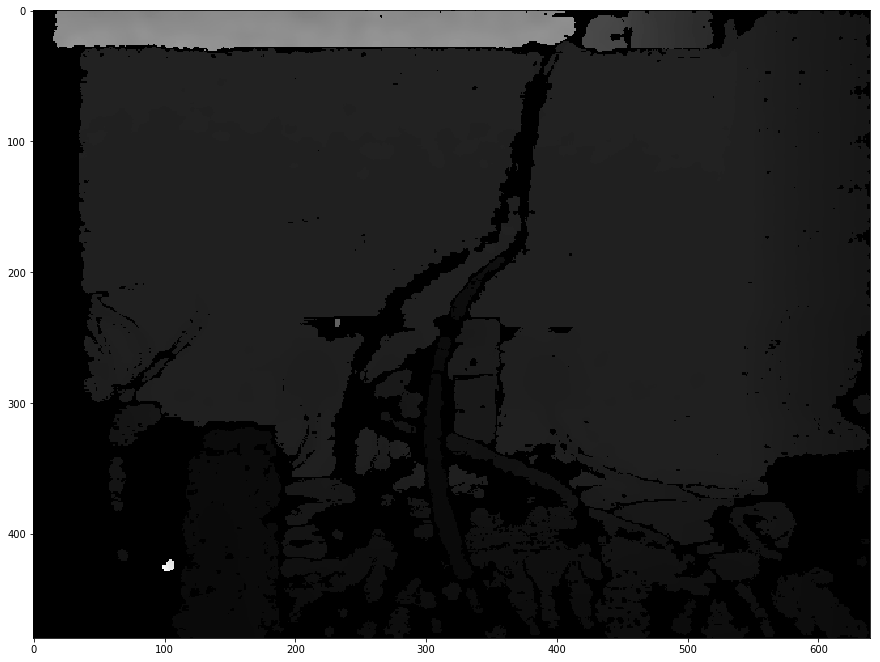

In [11]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(depth_image, cmap='gray')
plt.show()
